In [ ]:
import simpleaudio as sa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
archivo_wav1 = 'sound1.wav'
archivo_wav2 = 'sound2.wav'
archivo_wav3 = 'sound3.wav'
archivo_wav4 = 'sound4.wav'
archivo_wav5 = 'sound5.wav' 

### Reproducimos el audio 

In [ ]:
# Load a wave file and play it
wave_obj = sa.WaveObject.from_wave_file(archivo_wav1)
play_obj = wave_obj.play()
play_obj.wait_done()


### Representamos el wave file en tiempo continuo y discreto

In [ ]:
# List of audio files
audio_files = [archivo_wav1, archivo_wav2, archivo_wav3, archivo_wav4, archivo_wav5]

# Loop through each audio file
for archivo_wav in audio_files:
    # Load the wave file
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # The time vector
    tiempo = np.arange(0, len(datos)) 
    
    print(f'plot the wave {archivo_wav}')
    
    print('In continuous time')

    # In continuous time
    plt.figure(figsize=(6, 3))
    plt.plot(tiempo, datos)
    plt.title('Señal de audio en tiempo continuo - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()

    print('In discrete time')
    
    # In discrete time
    plt.figure(figsize=(6, 3))
    plt.stem(tiempo, datos)
    plt.title('Señal de audio en tiempo discreto - {}'.format(archivo_wav))
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.show()
    


### Ejercicio 1.2

Para los sonidos 1,2,3. Crea un vector que contenga un tramo de
100ms de la señal correspondiente en donde aparezca sonido

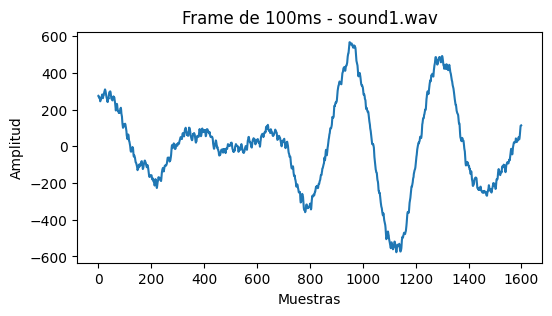

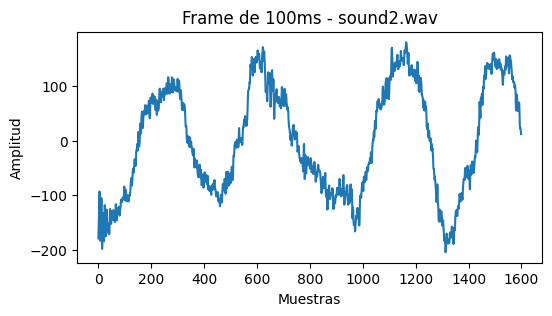

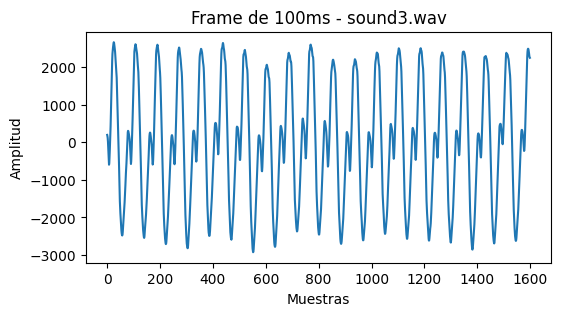

In [12]:
# List of audio files
audio_files_only_three = [archivo_wav1, archivo_wav2, archivo_wav3]


for archivo_wav in audio_files_only_three:
    # Get the sample rate and data
    frecuencia_muestreo, datos = wavfile.read(archivo_wav)

    # Calculate how many samples are in 100ms
    num_samples = int(frecuencia_muestreo * 0.1)

    # Create the frame vector
    frame = datos[:num_samples]

    # Plot the frame
    plt.figure(figsize=(6, 3))
    plt.plot(frame)
    plt.title('Frame de 100ms - {}'.format(archivo_wav))
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.show()
